# Titanic Competition
## Data from https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

traincsv = pd.read_csv('train.csv')
testcsv = pd.read_csv('test.csv')
traincsv.fillna({'Cabin':0},inplace = True)
testcsv.fillna({'Cabin':0},inplace = True)
def cabin(row):
    if row['Cabin']!=0:
        return 1
    else:
        return 0
traincsv['Cabin']= traincsv.apply(cabin,axis = 1)
testcsv['Cabin'] = testcsv.apply(cabin,axis=1)

idx = traincsv[traincsv['Embarked'].isna()].index
traincsv = traincsv.drop(index = idx)

In [2]:
traincsv.set_index('PassengerId',inplace=True)
testcsv.set_index('PassengerId',inplace=True)
traincsv.drop(columns=['Name','Ticket'],inplace= True)
testcsv.drop(columns=['Name','Ticket'],inplace = True)

agemean = traincsv['Age'].mean()
traincsv.fillna({'Age':agemean},inplace=True)

y_train = traincsv['Survived']
X_train = traincsv.drop(columns='Survived')
X_test = testcsv

In [3]:

#X_train.drop(columns='Cabin',inplace=True)
#X_test.drop(columns='Cabin',inplace=True)

X_train.replace({'male':0,'female':1},inplace = True)
X_test.replace({'male':0,'female':1},inplace = True)

<IPython.core.display.Javascript object>


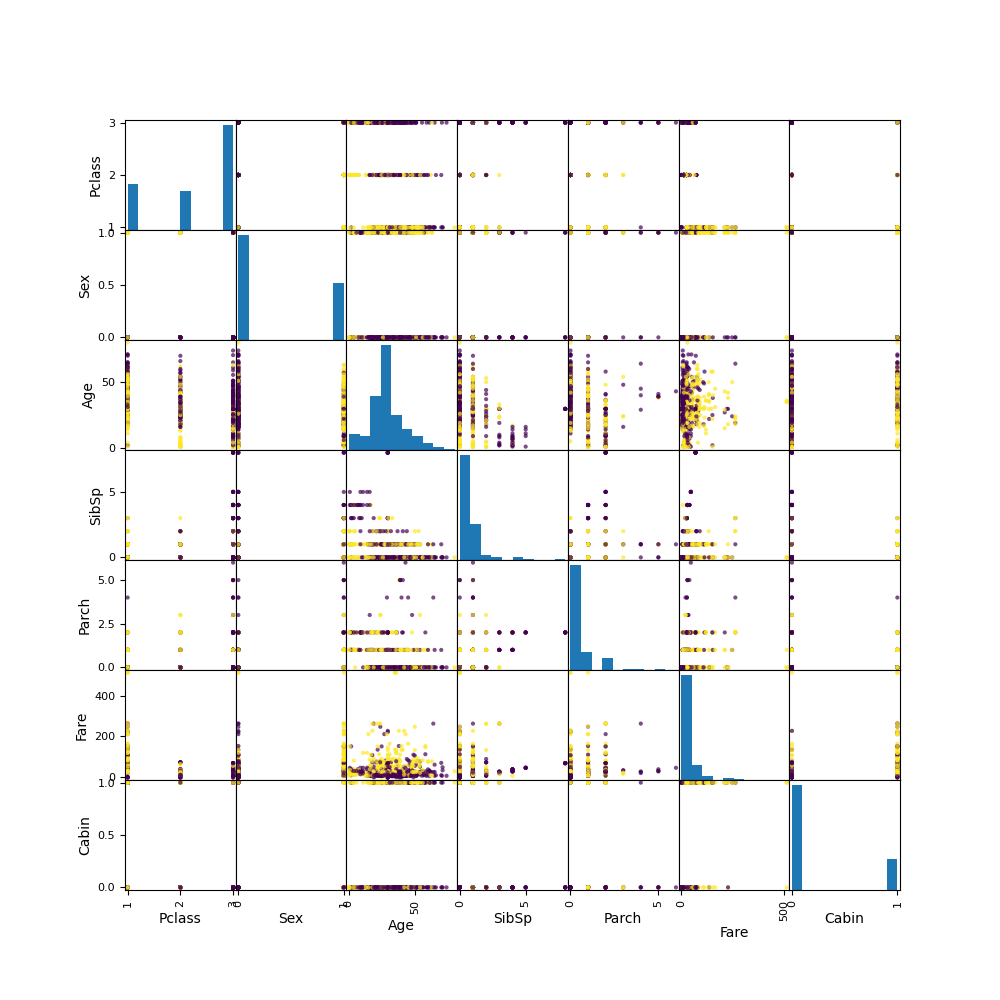

In [4]:
%matplotlib notebook
_=pd.plotting.scatter_matrix(X_train,c=y_train,figsize= (10,10),alpha=0.7)

In [5]:
X_train.replace({'S':0,'C':1,'Q':2},inplace = True)
X_test.replace({'S':0,'C':1,'Q':2},inplace = True)

In [6]:
X_test.fillna({'Age':X_test['Age'].mean()},inplace = True)
X_test.fillna(method = 'bfill',inplace=True)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,min_samples_split=10)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000)

In [9]:
csv=pd.Series(clf.predict(X_test),index=X_test.index,name = 'Survived')
csv.to_csv('titanic_predict')

In [11]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0
2,1,1,38.000000,1,0,71.2833,1,1
3,3,1,26.000000,0,0,7.9250,0,0
4,1,1,35.000000,1,0,53.1000,1,0
5,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
887,2,0,27.000000,0,0,13.0000,0,0
888,1,1,19.000000,0,0,30.0000,1,0
889,3,1,29.642093,1,2,23.4500,0,0
